In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from skimage import data,io

from skimage.color import rgb2hsv
from scipy import ndimage, misc

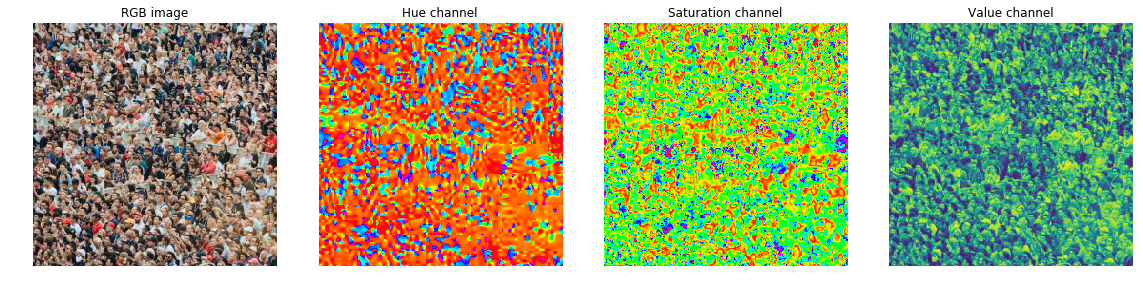

In [35]:
rgb_img = data.coffee()

rgb_img = io.imread('Wisdom-of-crowds.jpg')
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
sat_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(16, 4))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(sat_img, cmap='hsv')
ax2.set_title("Saturation channel")
ax2.axis('off')
ax3.imshow(value_img)
ax3.set_title("Value channel")
ax3.axis('off')

fig.tight_layout()

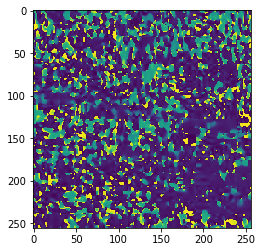

In [39]:
gauss = ndimage.gaussian_filter(hue_img, sigma=1/3)
plt.imshow(gauss)

In [9]:
print(hue_img)
print(sat_img)

[[0.06410256 0.05555556 0.04166667 ... 0.08148148 0.08052434 0.08333333]
 [0.07142857 0.05555556 0.08974359 ... 0.08333333 0.08333333 0.08333333]
 [0.08333333 0.03846154 0.07575758 ... 0.08333333 0.08608059 0.08608059]
 ...
 [0.06994048 0.07301587 0.07044674 ... 0.06380208 0.05694444 0.05555556]
 [0.07301587 0.07026144 0.07239057 ... 0.05270655 0.04824561 0.0497076 ]
 [0.07044674 0.06597222 0.07017544 ... 0.04861111 0.0497076  0.04532164]]
[[0.61904762 0.57142857 0.6        ... 0.39473684 0.38528139 0.38596491]
 [0.66666667 0.57142857 0.65       ... 0.40350877 0.3982684  0.40174672]
 [0.66666667 0.56521739 0.55       ... 0.40350877 0.39912281 0.39737991]
 ...
 [0.59259259 0.49065421 0.49238579 ... 0.77575758 0.74534161 0.7972028 ]
 [0.50724638 0.50746269 0.50510204 ... 0.75974026 0.7755102  0.7862069 ]
 [0.49238579 0.49230769 0.49222798 ... 0.75949367 0.79166667 0.7972028 ]]


In [37]:
def rad2complex(I):
    I_tilde = np.exp(1j*I)
    return I_tilde

def angular_diff(t1, t2):
    ans = (t2-t1+np.pi) % (2*np.pi) - np.pi
    return ans

def wrap_index(U,V,w,h):
    u = U
    v = V
    if U>=h:
        u= U-h
        
    if V>=w:
        v = V-w
        
    return u,v

def LoG_I(Ih_tilde, Is, r, alpha):
    w = Is.shape[1]
    h = Is.shape[0]
    
    I_gauss_r = ndimage.gaussian_filter(np.real(Ih_tilde), sigma=1/3)
    I_gauss_i = ndimage.gaussian_filter(np.imag(Ih_tilde), sigma=1/3)
    I_gauss = I_gauss_r + 1j*I_gauss_i
    
    LoGI = np.zeros((h,w))
    for u in range(h):
        for v in range(w):
            s = 0
            for U in range(u-r, u+r+1):
                for V in range(v-r, v+r+1):
#                     s = s + angular_diff(I_gauss[U,V], I_gauss[u,v]) * (Is[u,v] * Is[U,V])**alpha
                    U_wrap,V_wrap = wrap_index(U,V,w,h)
                    s = s + angular_diff(np.angle(I_gauss[U_wrap,V_wrap]), np.angle(I_gauss[u,v])) * (Is[u,v] * Is[U_wrap,V_wrap])**alpha
                    
            LoGI[u,v] = s
            
    return LoGI

def feat_1(Ih, Is, r):
    alpha = 0.25
    Ih_tilde = rad2complex(Ih)
    LoGI = LoG_I(Ih_tilde, Is, r, alpha)
    feat = ndimage.gaussian_filter(LoGI, sigma=r/3)
    
    return feat

def feat_2():
    

def binary_img(I_h, k):
    

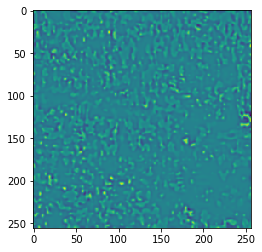

In [38]:
# Ih_tilde = rad2complex(hue_img)
# r=3
# LoGI = LoG_I(Ih_tilde, sat_img, r, 0.25)

# plt.imshow(LoGI)

feat1 = feat_1(hue_img, sat_img, 3)
plt.imshow(feat1)